In [2]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [11]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        reader = csv.reader(training_file)
        next(reader)
        labels = []
        images = []
        for row in reader:
            labels.append(row[0])
            img_tmp = np.array(row[1:785])
            
            img_tmp = np.array(np.array_split(img_tmp, 28))
            images.append(img_tmp)
            img_tmp = []
            
        labels = np.array(labels).astype(float)
        images = np.array(images).astype(float)
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [12]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,  axis=-1)
testing_images = np.expand_dims(testing_images,  axis=-1)


# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    zoom_range = 0.2,
    rotation_range=45,
    shear_range=0.2,
    height_shift_range=0.2
    )

training_gen = train_datagen.flow(training_images,
                                  training_labels,
                                  batch_size=20)

validation_datagen = ImageDataGenerator()

validation_gen = train_datagen.flow(testing_images,
                                    testing_labels,
                                    batch_size=20)

    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [19]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28), activation='relu'),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(128,  activation='relu'),
    tf.keras.layers.Dense(64,  activation='relu'),
    tf.keras.layers.Dense(26,  activation='softmax')   
    ])

# Compile Model. 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(training_gen, epochs=14, steps_per_epoch=1373, validation_steps=359, validation_data=validation_gen, verbose=2)

model.evaluate(testing_images, testing_labels, verbose=0)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1373 steps, validate for 359 steps
Epoch 1/14
1373/1373 - 25s - loss: 5.6262 - accuracy: 0.0547 - val_loss: 3.2122 - val_accuracy: 0.0520
Epoch 2/14
1373/1373 - 23s - loss: 3.1688 - accuracy: 0.0781 - val_loss: 3.1464 - val_accuracy: 0.0640
Epoch 3/14
1373/1373 - 24s - loss: 3.0714 - accuracy: 0.0954 - val_loss: 3.0789 - val_accuracy: 0.0703
Epoch 4/14
1373/1373 - 25s - loss: 2.9793 - accuracy: 0.1128 - val_loss: 2.9642 - val_accuracy: 0.1079
Epoch 5/14
1373/1373 - 24s - loss: 2.8681 - accuracy: 0.1405 - val_loss: 2.8825 - val_accuracy: 0.1419
Epoch 6/14
1373/1373 - 25s - loss: 2.6904 - accuracy: 0.1873 - val_loss: 2.6775 - val_accuracy: 0.1861
Epoch 7/14
1373/1373 - 23s - loss: 2.4344 - accuracy: 0.2432 - val_loss: 2.4012 - val_accuracy: 0.2616
Epoch 8/14
1373/1373 - 23s - loss: 2.1923 - accuracy: 0.3039 - val_loss: 2.1653 - val_accuracy: 0.3095
Epoch 9/14
1373/1373 - 23s - loss: 1.9930 - accuracy: 0.3576 - val_loss: 2.0115 -

[1.1737629002322714, 0.5899331]

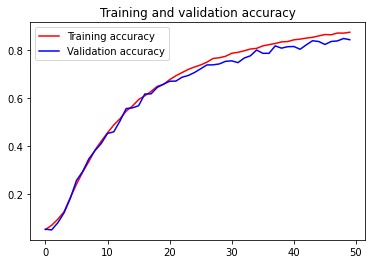

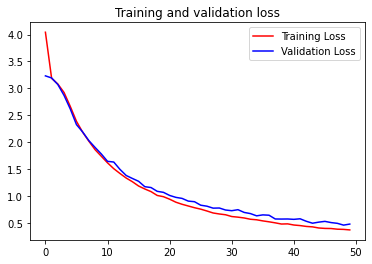

In [18]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);